In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X=data.iloc[:,1:]

In [5]:
Y=data.iloc[:,0]

In [6]:
Y.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [7]:
type(Y)

pandas.core.series.Series

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2, random_state=1)

In [9]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [10]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
y_pred=clf.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8582142857142857

In [31]:
param_dict={
    "criterion" : ["gini","entropy"],
    "max_depth" : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,None],
    "max_features" : ["auto","sqrt","log2",None],
    "min_samples_leaf" : [100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,None],
    "min_samples_split" : [100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,None]
}

# knn

In [13]:
np.sqrt(X_train.shape[0])

183.3030277982336

In [68]:
accuracy=[]
from sklearn.neighbors import KNeighborsClassifier
for i in range(150,170):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    accuracy.append(accuracy_score(y_test,knn.predict(X_test)))

In [69]:
accuracy

[0.9183333333333333,
 0.9186904761904762,
 0.9180952380952381,
 0.9179761904761905,
 0.9183333333333333,
 0.9183333333333333,
 0.9182142857142858,
 0.9177380952380952,
 0.9173809523809524,
 0.9175,
 0.9171428571428571,
 0.9169047619047619,
 0.9167857142857143,
 0.9161904761904762,
 0.9166666666666666,
 0.9161904761904762,
 0.915952380952381,
 0.9157142857142857,
 0.9152380952380952,
 0.9154761904761904]

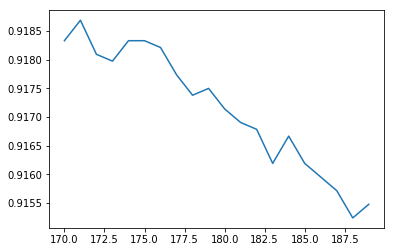

In [70]:
plt.plot(range(170,190),accuracy)

In [20]:
accuracy.index(max(accuracy))

1

In [21]:
max(accuracy)

0.9152380952380952

In [60]:
knn=KNeighborsClassifier(n_neighbors=171)
knn.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=171, p=2,
                     weights='uniform')

In [61]:
test=pd.read_csv('test.csv')

In [62]:
predknn=knn.predict(test)

In [63]:
list(test.reset_index()['index']+1)[-5:]

[27996, 27997, 27998, 27999, 28000]

In [64]:
kfinal=pd.DataFrame(list(zip(list(test.reset_index()['index']+1),predknn)), columns=['ImageId','Label'])

In [65]:
kfinal=kfinal.set_index('ImageId')

In [66]:
kfinal.to_csv('digit_prediction_knn.csv')

In [67]:
kfinal.shape

(28000, 1)

In [59]:
kfinal.head()

,Label
ImageId,
1,2
2,0
3,9
4,7
5,3
